In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               6
Dependents           15
Education             9
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     21
Credit_History       50
Property_Area         9
Loan_Status           0
dtype: int64

Finding outliers for CoapplicantIncome which has 0 null value

In [4]:
dataset.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,583.000000,596.000000,598.000000,576.000000,577.000000,548.000000
mean,0.754717,5291.788591,1631.499866,144.895833,342.218371,0.843066
std,1.005077,5816.968137,2953.315785,82.757474,64.319629,0.364071
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2875.750000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3787.500000,1211.500000,126.500000,360.000000,1.000000
75%,1.500000,5746.000000,2324.000000,166.250000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


<Axes: xlabel='CoapplicantIncome'>

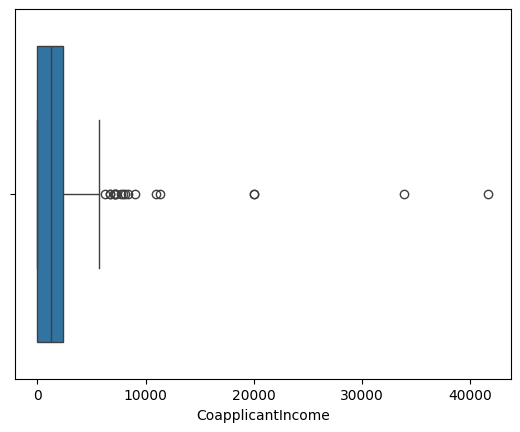

In [6]:
sns.boxplot(x="CoapplicantIncome", data=dataset)

C:\Users\tanay\AppData\Local\Temp\ipykernel_19024\1325535347.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"]) # also plot a normal distribution curve so that we can see if outliers are present after the 3rd standard deviation or not


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

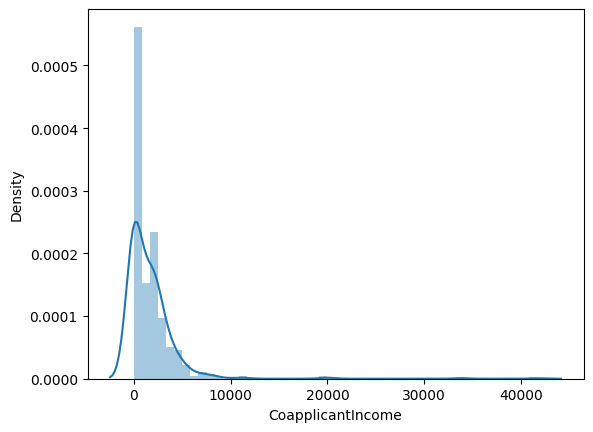

In [9]:
sns.distplot(dataset["CoapplicantIncome"]) # also plot a normal distribution curve so that we can see if outliers are present after the 3rd standard deviation or not 

Removing outliers using direct method

In [10]:
min_range = dataset["CoapplicantIncome"].mean() - (3 * dataset["CoapplicantIncome"].std())  # values less than 3 standard deviations away from the mean are considered potential outliers. "Lower bound: μ − 3σ"
max_range = dataset["CoapplicantIncome"].mean() + (3 * dataset["CoapplicantIncome"].std())  # values more than 3 standard deviations away from the mean are considered potential outliers. "Upper bound: μ + 3σ"

In [11]:
print("Lower bound:", min_range)
print("Upper bound:", max_range)

Lower bound: -7228.447487834454
Upper bound: 10491.447220237931


<Axes: xlabel='CoapplicantIncome'>

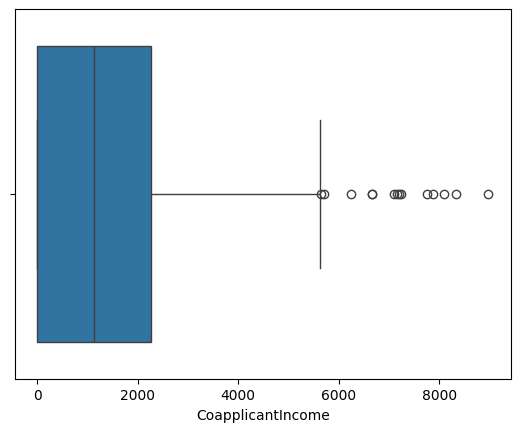

In [ ]:
new_data = dataset[(dataset["CoapplicantIncome"] > min_range) & (dataset["CoapplicantIncome"] < max_range)] # filter the dataset to remove outliers

sns.boxplot(x="CoapplicantIncome", data=new_data)

In [15]:
new_data.shape

(592, 13)

Using Z-Score

In [14]:
z_score = (dataset["CoapplicantIncome"] - dataset["CoapplicantIncome"].mean()) / dataset["CoapplicantIncome"].std()  # calculate z-scores
print("Z-scores:\n", z_score)

Z-scores:
 0     -0.552430
1     -0.041817
2     -0.552430
3      0.245995
4     -0.552430
         ...   
593   -0.552430
594   -0.552430
595   -0.471165
596   -0.552430
597   -0.552430
Name: CoapplicantIncome, Length: 598, dtype: float64


In [16]:
dataset["z_score"] = z_score  # add z-scores to the dataset
dataset[dataset["z_score"]<3]  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,-0.552430
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,-0.041817
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,-0.552430
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,0.245995
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,-0.552430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y,-0.552430
594,LP002979,Male,Yes,3.0,NaN,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y,-0.552430
595,LP002983,Male,Yes,1.0,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y,-0.471165
596,LP002984,Male,Yes,2.0,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y,-0.552430
